# Double pole balancing task solved by function approximation

This problem consist in two separate poles that are attached by a hinge to a cart. The poles differ in length and mass and must both be balanced by hitting the cart. 

The double Pole Balancing task requires balancing two poles hinged on a wheeled cart with a finite length track defined in
the interval $(-2.4<x<+2.4)$ and exerting a constant force, $F$ every $0.02 s$, in left and right direction. The pole is said to be unbalanced
if either the angle of poles exceeds the threshold $(-36 < \theta < +36)$ or the cart leaves the track. The equations of motion are

$$
\begin{align}
M &= m_c + m_1 + m_2 \\
\ddot{x} &= \frac{g cos\theta_1sin\theta_1 + g cos\theta_2 sin\theta_2  - \frac{7}{3}(F + m_1 l_1 sin\theta_1\dot{\theta_1}^2 + m_2 l_2 sin\theta_2\dot{\theta_2}^2) - \frac{\mu_1 \dot{\theta_1} cos\theta_1}{l_1} - \frac{\mu_2 \dot{\theta_2} cos\theta_2}{l_2}}{m_1cos^2\theta_1 + m_2cos^2\theta_2 - \frac{7}{3}M} \\
\ddot{\theta_1} &= \frac{3}{7}\frac{g sin\theta_1 - \ddot{x} cos\theta_1 - \frac{\mu_1 \dot{\theta}_1}{m_1 l_1}}{l_1} \\
\ddot{\theta_2} &= \frac{3}{7}\frac{g sin\theta_2 - \ddot{x} cos\theta_2 - \frac{\mu_2 \dot{\theta}_2}{m_2 l_2}}{l_2}
\end{align}
$$

Source: 

https://sharpneat.sourceforge.io/research/cart-pole/cart-pole-equations.html

### Reinforcement Learning approach
>The first concept we have to keep in mind when we are doing reinforcement learning is that a lot of it takes place as a conversation between the $\textbf{Agent}$ and the $\textbf{Environment}$. The agent is going to reveal to the agent in the form of the state $\textbf{S}$, which for our problem is a 6 dimensional vector who includes the generalized coordinates of the system:  $\newline$
$$
S = (x, \dot{x}, \theta_1, \dot{\theta}_1, \theta_2, \dot{\theta}_2)
$$$\newline$
Then, the agent influence the environment by taking $\textbf{actions}$ and it will receive back a $\textbf{reward}$, this reward will be $1$ if the poles have not fallen yet. $\newline$ 
This problem is $\textbf{Model free}$ because there is not known of the transition probability distribution between states. So it is more convenient to use the $Q$-Value function instead of $V$-value. TD-Control with $Q$-value function is very convenient, because ideally once one has calculated the optimal value $Q^*(s,a)$, the optimal policy is easily found just by taking the action that maximizes it. $\newline$ 
Recall the Bellman's optimality eq.$\newline$ 
$$
Q^*(s_t,a_t) = \sum_{s'}p(s'|s_t,a_t)(r(s_t,a_t,s') + \gamma max_a Q^{*}(s',a'))
$$$\newline$
What we will trying to learn is an optimal policy defined as:$\newline$
$$ 
\pi^*(a_t|s_t) = argmax_a Q^*(s_t,a_t)
$$$\newline$
Once the agent is learning from their experience, we need a balance between $\textbf{Exploration}$ and $\textbf{Exploitation}$. The partial knowledge of the environment for the agent convert it in a dilemma if it should exploit the partial knowledge and receive some reward or should it explore the unknown actions which can possible result in much larget reward. $\textbf{e-greedy}$ policy gives best results as it balances between exploitation of current knowledge and exploration of unknown territory. So the greedy policy is defined as$\newline$
$$
\pi^e(s_t) = \left\lbrace\begin{array}{c} argmax_a Q(s_t,a_t) \\ any~a \end{array}\right.
$$$\newline$
Where Q(s,a) in our case will be updated with $\textbf{SARSA on poliy with TD learning}$$\newline$ 
$$
\begin{align}
a &= \pi^e(s_t) \\
Q(s_t,a_t) &= Q(s_t,a_t) + \alpha (r_{t+1} + \gamma Q(s_{t+1},a_{t+1}) - Q(s_t,a_t))
\end{align}
$$$\newline$
It is on policy because the same policy that is evaluated and improve is also used to select actions.

### Value Function approximation

> One of the most immportant cases of function approximation is that in which the approximate function, is a linear function of the weight vector $w$. Corresponding to every state there is a real-valued vector called the feature vector $x$, with the same number of components as $w$
>#### 1. Calculation
We will define an auxiliary __weight__ vector $w$, such that the value is a function of both the state $s$ and $w$. We will write in a very general way $V(s, w)$, or $Q(s,a,w)$.
$w$ contains all our knowledge of the value function for all states. At a given time $t$, we will have one vector ${w}^*$: then, the value function for all states will be calculated as $V(s, w*)$, or $Q(s,a,w*)$.
>#### 2. Update
>Since the **weights** $w$ contain all information on the value, we will not update anymore the value $V$ or $Q$ itself, but **we will update the weights $w$ instead**.
The update will follow the rule. Where the values used to be changed with: (TD Learning)$\newline$
$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha (r_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t)) \\
$$
>Now at time $t$ we update the weights as:
$$
w \leftarrow w + \alpha (r_{t+1} + \gamma \hat{Q}(s_{t+1}, a_{t+1}) - \hat{Q}(s_t, a_t)) \nabla \hat{Q}(S_t, A_t, \mathbf{w})
$$$\newline$
>Where $\nabla f = (\frac{\partial f}{\partial w_1}, \frac{\partial f}{\partial w_2},\dots, \frac{\partial f}{\partial w_d} )$. So instead of changing $Q$ directly, we update $Q$ _through_ the change in the weights $w$.

###  Linear approximation.

>First of all we construct a basis of $d$ _features_ $x = (x_1, x_2, \dots, x_d)$ to evaluate the value functions. 
Each state then has a feature vector of $d$ real-valued components ${x}(s) = (x_1(s), x_2(s), x_2(s), \dots, x_d(s))$.
The convenient part of the _features_ is that its dimension can be much smaller than the actual state space $d << |S|$.$\newline$
>Features can be defined in many ways (but clearly work best when they are chosen with care).
Then, the value function in the linear approximation reads as:$\newline$
$$
V(s) = \sum_i^d w_i x_i(s) 
$$ $\newline$
>_NB: The approximation can be done both for the state $s$ and for the action $a$! Since the "cart pole" example has only two allowed actions, we will deal only with approximation related to the state $s$ and keep the two actions distinct! So in our case we will have the Q-value in linear approximation, written as:_
$$
Q(s,a) = \sum_i^d w_i^a x_i(s) \,\,\,\,\,\,\,\, a=0,1
$$$\newline$
And we will keep two sets of weights $\{w^a \}$, one for each actions. The method we use today is therefore _half_ tabular (in action space) and _half_ in function approximation (in state space).

### State aggregation.
>State aggregation is a very straightforward method to choose the features to reduce the size/dimension of the state space.
At its core, the state space is divided into regions $D_i$ and the components of $x(s)$ are just $x_i(s) = \mathbb{1}(s \in D_i)$.
​
>This means that we still have a **tabular entry for values**, not for each state $s$ but **for each region $D_i$**
​
​
### The implementation of the algorithm:
>- In a state $S_t$ we find $x(S_t)$ and calculate $Q(S_t, a, w) = w^T x(S_t)$
>- We use  $Q(S_t, a, w)$ to select an action  $A_t$
>- Acting on state $S_t$ with action $A_t$ we obtain the reward $R_{t+1}$ and the new state $S_{t+1}$
>- We map $S_{t+1}$ in the corresponding $x(S_{t+1})$ (and $S_t$ to $x(S_{t})$)
>- We update the value of the weights $w$ using $R_{t+1}$ and the previously estimated $Q(S_t, A_t, w)$
>- What happens at the term $\nabla \hat{Q}(S_t, A_t, \mathbf{w})$? Let us see what the estimate $Q$ is in terms of the features $x$ and weights $w$:$\newline$

$$
Q(S_t, A_t, \mathbf{w}) =  \sum_i \, w_i^{a=A_t} \, x_i(S_t) \\
Q(S_t, A_t, \mathbf{w}) =  \sum_i \, w_i^{a=A_t} \, \mathbb{1}(S_t \in D_i)\\
Q(S_t, A_t, \mathbf{w}) = w_j^{a=A_t}  
$$$\newline$
​
>Where $j$ is exactly the region to which $S_t$ belongs. 
In practice, the weights are exactly the estimation of the value for that region.
($\nabla \hat{Q}(S_t, A_t, \mathbf{w}) = (0,0,\dots,1,\dots,0)$, i.e. a vector of zeros with only a single $1$ at position $j_{th}$.)

## The environment

For the Double Balancing problem, the environment of the $\textbf{CartPole-v1}$ of the library $\textbf{gym}$ have been modified and called $\textbf{DoublePole-v0}$, were was included additionally another pole of different size and weight.

The parameters used in the dynamics are:

* $g = 9.8 m/s^2$

* $m_c = 1.0 kg$

* $m_1 = 0.10 kg$

* $m_2 = 0.05 kg$

* $M = m_c +m_1 + m_2$

* $l_1 = 1 m$

* $l_2 = 0.5 m$

* $F = 50.0 N$

* $\tau = 0.02 s$

**Friction coefficients**

* $\mu_c = 5x10^{-4}$ 

* $\mu_{p1} = 2x10^{-6}$

* $\mu_{p2} = \mu_{p2}$ 

In [14]:
#Checking the environment
import gym
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib import animation

env = gym.make('DoublePole-v0')
env.reset()
frames1 = []
for _ in range(200):
    #To make the video
    frames1.append(env.render(mode = 'rgb_array'))
    # for visualization
    env.render()
    # taking a random action
    env.step(env.action_space.sample()) 

env.close()

C:\Users\ivana\anaconda3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


MovieWriter imagemagick unavailable; using Pillow instead.


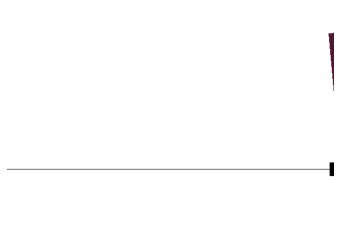

In [16]:
#function to save as a gift
def display_frames_as_gif(frames):
    patch = plt.imshow(frames[0])
    plt.axis('off')
    def animate(i):
        patch.set_data(frames[i])
        
    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=5)
    anim.save('./resultsolo.gif', writer='imagemagick', fps=45)


display_frames_as_gif(frames1)    

## State Space

As it was mentioned earlier, the state space is a 6 dimensional vector who includes the generalized coordinates of the system:

$$
S = (x, \dot{x}, \theta_1, \dot{\theta}_1, \theta_2, \dot{\theta}_2)
$$

This can be represented as a Box(6) object, which is a 6-dimensional vector of floats. Each dimension can be bounded, and represents the following observables:

In [3]:
print("State space: ", env.observation_space)
print()

low_bounds, high_bounds = (env.observation_space.low, env.observation_space.high)
print("1st element:\tPosition of the cart along the x-axis. Bounds: [%2.1f, %2.1f]" %(low_bounds[0], high_bounds[0]))
print("2nd element:\tCart velocity. Not bounded")
print("3rd element:\tPole1 angle. Bounds in radiants: [%2.1f, %2.1f]" %(low_bounds[2], high_bounds[2]))
print("4th element:\tPole1 velocity at its tip. Not bounded")
print("3rd element:\tPole2 angle. Bounds in radiants: [%2.1f, %2.1f]" %(low_bounds[2], high_bounds[2]))
print("4th element:\tPole2 velocity at its tip. Not bounded")

State space:  Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (6,), float32)

1st element:	Position of the cart along the x-axis. Bounds: [-4.8, 4.8]
2nd element:	Cart velocity. Not bounded
3rd element:	Pole1 angle. Bounds in radiants: [-1.3, 1.3]
4th element:	Pole1 velocity at its tip. Not bounded
3rd element:	Pole2 angle. Bounds in radiants: [-1.3, 1.3]
4th element:	Pole2 velocity at its tip. Not bounded


## Sarsa Temporal difference control with state aggregation

The next step is to construct a class who includes all that was mentioned before. This would be called $\textbf{SARSA_TDControl_state_aggregation}$ and will contain 4 functions

> * $\textbf{state_aggregate}$:   This function creates regions in the space (a way to discretize). This is done by a binning approach as follows. $\newline$
A continuous variable $s$ defined in the interval $[s_{start}, s_{end}]$ could be divided into $N$ bins $\{s_i\}$, such that $x(s) = s_i$ if:$\newline$
$$
s_{start} + i \cdot (s_{end} + s_{start})/N < s < s_{start} + (i+1)\cdot (s_{end} + s_{start})/N 
$$. $\newline$
We can do this in many dimensions. For example in 2D, we can divide each dimension, than for each state we have two identifying integers.$\newline$
> * $\textbf{single_step_update}$: This function uses a single step to update the values, using Temporal Difference for Q values$\newline$
> * $\textbf{get_action_epsilon_greedy}$: Chooses an action at random using an epsilon-greedy policy.$\newline$
> * $\textbf{greedy_policy}$: This function refers to the probability of choosing to explore and exploits most of the time with a small chance of exploring

In [2]:
class SARSA_TDControl_state_aggregation():
    def __init__(self, space_size, action_size, binning, Nbinning, gamma=1, lr_v=0.5):
        '''
        Calculates optimal policy using in-policy Temporal Difference control
        Approximate Q-value for (S,A) pairs, using one-step updates and state aggregation!
        '''     
        # the discount factor
        self.gamma = gamma
        # size of system
        # We don't truly need the space_size anymore, we work in feature space!
        self.feature_size = space_size
        
        # action size
        self.action_size = action_size

        # needed for state aggregation
        self.binning = binning
        self.Nbinning = Nbinning
        
        # the learning rate
        self.lr_v = lr_v
        
        # We used to have Qvalues... now we have weights!
        Nbins = self.Nbinning
        
        self.w = np.zeros((*Nbins, self.action_size))+50
        
    def state_aggregate(self, state):
        '''
        Function state agregation
        
        binning is an array who contains the information about the upper bound
        and the lower bound of each dimension.
        
        Nbinning is the number of regions in which each dimension should be divided 
        
        This function returns a feature vector x (in this case matrix for convenience) of all zeros except for one 1
        and a vector x_indexes that is the exact position of the x (vector of indexes)
        
        The features belongs to a regions of the 6D array
        
        '''
        # Nbinning is a tuple (N1, N2, N3, N4, N5, N6), with #bins for each of the six dimensions
        # which define dimension of features
        Nbins = self.Nbinning
        x = np.zeros((*Nbins,))
        
        # x_indexes is the (only) index equal to 1 as dictated by the formula 1(s in D_s)
        x_indexes = np.array([0,0,0,0,0,0], dtype='int')   #Wrong
        
        for i,s in enumerate(state):
            #if the state is below the lower bound 
            if s <= self.binning[i,0]:
                x_indexes[i] = 0
            #if the state is above the upper bound 
            elif s >= self.binning[i,1]:
                x_indexes[i] = self.Nbinning[i]-1
            #else it is somewhere between
            else :
                x_indexes[i] = np.floor((s-self.binning[i,0])/(self.binning[i,1]-self.binning[i,0])*self.Nbinning[i])
                
        x[(*x_indexes,)] = 1
        return x, x_indexes
        
        
    def single_step_update(self, s, a, r, new_s, new_a, done):
        ''' 
        Uses a single step to update the values, using Temporal Difference for Q values.
        Employs the EXPERIENCED action in the new state  <- Q(S_new, A_new).
        ''' 
        
        x, x_index = self.state_aggregate(s)
        new_x, new_x_index = self.state_aggregate(new_s)
        
        if done:
         
            deltaQ = (r + 0 - self.w[(*x_index, a)])
            
        else:
            deltaQ = (r + self.gamma * self.w[(*new_x_index, new_a)] - self.w[(*x_index, a)])
            
        #Update
        self.w[(*x_index, a)] += self.lr_v * deltaQ
        
        
    def get_action_epsilon_greedy(self, s, eps):
        ''' 
        Chooses an action at random using an epsilon-greedy policy with the current Q(s,a).
        ''' 
        ran = np.random.rand()
                      
        # features of the state
        x, x_index = self.state_aggregate(s)    
       
        Qvalue_approx = self.w[(*x_index,)]
        
        if (ran < eps):
            # probability is uniform for all actions!
            prob_actions = np.ones(self.action_size) / self.action_size 
        else:
            # finding the best Qvalue
            best_value = np.max( Qvalue_approx )
            
            # There could be actions with equal value! 
            best_actions = ( Qvalue_approx == best_value )

            # The best actions is 
            prob_actions = best_actions / np.sum(best_actions)
            
        # Take one action from the array of actions with the probabilities as defined above.
        a = np.random.choice(self.action_size, p=prob_actions)
        return a 
        
    def greedy_policy(self, s):
        x, x_index = self.state_aggregate(s)  

        Qvalue_approx = self.w[(*x_index,)]
        greedy_pol = np.argmax(Qvalue_approx)
        return greedy_pol, Qvalue_approx

0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 1210 1220 1230 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330 1340 1350 1360 1370 1380 1390 1400 1410 1420 1430 1440 1450 1460 1470 1480 1490 1500 1510 1520 1530 1540 1550 1560 1570 1580 1590 1600 1610 1620 1630 1640 1650 1660 1670 1680 1690 1700 1710 1720 1730 1740 1750 1760 1770 1780 1790 1800 1810 1820 1830 1840 1850 1860 1870 1880 1890 1900 1910 1920 1930 1940 1950 1960 1970 1980 1990 2000 2010 2020 2030 2040 2050 2060 2070 2080 2090 2100 2110 2120 2130 2140 2150 2160 2170 2180 2190 2200 2210 2

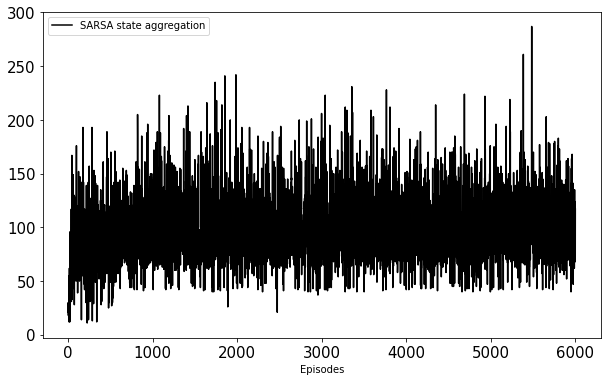

In [10]:
# TD(0) CONTROL: SARSA over DoublePole with state aggregation.
import numpy as np
import gym
import matplotlib.pyplot as plt

n_episodes = 6000

gamma = 1
Nbinning=(1,1,3,3,3,6)
binning=np.array([[-4.8, 4.8],[-2.8, 2.8],[-0.09,0.09],[-5,5],[-0.04,0.04],[-1.5,1.5]])

# Initialize 
epsilon_0 = 1
lr_v_0 = 0.5

# Initialize algorithm
SARSA = SARSA_TDControl_state_aggregation(space_size=6, 
                                          action_size=2, 
                                          binning=binning,
                                          Nbinning=Nbinning,
                                          gamma=gamma, 
                                          lr_v=lr_v_0)


performance_traj_stateAggr = np.zeros(n_episodes)

count = 0
tstar = 0
epsilon = epsilon_0

env = gym.make('DoublePole-v0')
env.reset()
frames = []

# Run over episodes
for i in range(n_episodes):
    done = False

    if (i%10==0):
        print(i, end=' ')
    
    s = env.reset()
    a = SARSA.get_action_epsilon_greedy(s, epsilon)
    
    while not done:

        # keeping track for convergence
        count += 1
        
        # Evolve one step
        new_s, r, done, info = env.step(a)
        
        # Keeps track of performance for each episode
        performance_traj_stateAggr[i] += r
        
        # Choose new action index
        new_a = SARSA.get_action_epsilon_greedy(new_s, epsilon)
       
        # Single update with (S, A, R', S', A')
        SARSA.single_step_update(s, a, r, new_s, new_a, done)
        
        a = new_a
        s = new_s
        
        if count > tstar:
            
            # UPDATE OF LEARNING
            SARSA.lr_v = lr_v_0/(1 + 0.001*(count - tstar)**0.75)
            
            # UPDATE OF EPSILON
            epsilon = epsilon_0/(1. + 0.001*(count - tstar)**1.05)
            
        if (i > 3000) & (i < 3015) :
            frames.append(env.render(mode = 'rgb_array'))

env.close()  
print(count)
fig, ax = plt.subplots(figsize=(10,6))  # Create a figure and an axes.
ax.plot(np.arange(n_episodes), performance_traj_stateAggr, label='SARSA state aggregation', color ='k')
ax.set_xlabel('Episodes')
ax.legend()

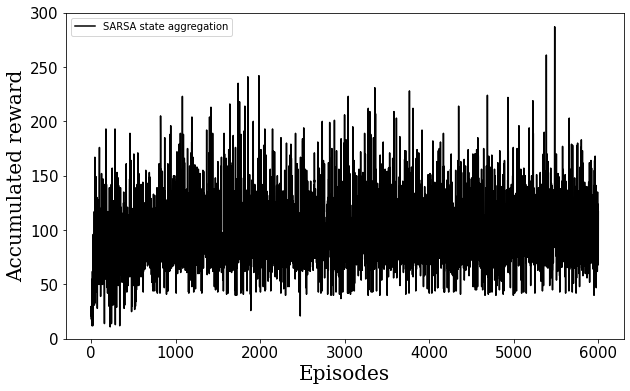

In [14]:
#Creating the figure
fig, ax = plt.subplots(figsize=(10,6))  # Create a figure and an axes.
ax.plot(np.arange(n_episodes), performance_traj_stateAggr, label='SARSA state aggregation', color ='k')
ax.set_xlabel('Episodes', family = 'serif', fontsize = 20)
ax.set_ylabel('Accumulated reward', family = 'serif', fontsize = 20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
ax.legend()
ax.set_ylim(0,300)
plt.savefig('Sarsa_state_aggregation.png')

## Final note:

The solution with state aggregation requires as entries previous knowledge of the system. That means that the selection of the binnings has to be choosen intelligently. What was done here was to pay attention to small angles of the poles and to the angular velocity of the second pole, due to the fact that it is the first to fall. More information added may improve the perfomance of the accumulated rewards. Another suggestion is to explore in a wide rage of parameters and then extract the physical information to confirm that this problem can be solved perfectly with state aggregation.

# The video

MovieWriter imagemagick unavailable; using Pillow instead.


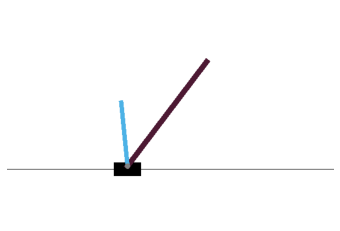

In [13]:
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib import animation
def display_frames_as_gif(frames):
    patch = plt.imshow(frames[0])
    plt.axis('off')
    def animate(i):
        patch.set_data(frames[i])
        
    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=5)
    anim.save('./result1.gif', writer='imagemagick', fps=30)

display_frames_as_gif(frames) 

# References

* https://github.com/epanizon/Lectures2021

* https://towardsdatascience.com/how-to-beat-the-cartpole-game-in-5-lines-5ab4e738c93f

* Van Hasselt, Hado. (2013). Reinforcement Learning in Continuous State and Action Spaces. 10.1007/978-3-642-27645-3_7. 

* Richard S. Sutton and Andrew G. Barto. 2018. Reinforcement Learning: An Introduction. A Bradford Book, Cambridge, MA, USA.